In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!ls '/content/drive/My Drive/Benchmarks/2events/BPIC14_f'


BPIC14_f_2.csv	      BPIC14_f_events.pnml  BPIC14_f_no_need.csv
BPIC14_f_2events.csv  BPIC14_f_events.xes


In [3]:
!pip install pm4py

     |████████████████████████████████| 337kB 2.8MB/s 
     |████████████████████████████████| 13.6MB 34.0MB/s 
     |████████████████████████████████| 48.5MB 36.9MB/s 
     |████████████████████████████████| 12.6MB 35.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/5e/76/77/e28b22219e46e3b4b033f02e8b36b2770ae545bdcf60c2b224
  Stored in directory: /root/.cache/pip/wheels/72/cd/ca/9058cc007cf5b7110011a6879defcb5486e7b987e7dcf077c2
Successfully built pulp ciso8601
ERROR: plotnine 0.5.1 has requirement matplotlib>=3.0.0, but you'll have matplotlib 2.2.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: pyarrow 0.14.0
    Uninstalling pyarrow-0.14.0:
      Successfully uninstalled pyarrow-0.14.0
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.objects.log.exporter.csv import factory as csv_exporter
import pandas as pd


In [0]:
#File path
filename = '/content/drive/My Drive/Benchmarks/BPIC14_f/BPIC14_f.xes'
log = xes_import_factory.apply(filename)

# Converting log file to csv
csv_exporter.export(log, '/content/drive/My Drive/Excel/no_need.csv')

# Reading the csv file
filename = '/content/drive/My Drive/Excel/no_need.csv'
df_xes = pd.read_csv(filename)

In [19]:
df_xes.head()

case:concept:name  ...             time:timestamp
0         IM0026278  ...  2014-01-07 15:25:34-06:00
1         IM0026278  ...  2014-01-07 15:57:44-06:00
2         IM0026278  ...  2014-01-07 15:57:44-06:00
3         IM0026278  ...  2014-01-08 09:27:04-06:00
4         IM0026278  ...  2014-01-08 09:27:04-06:00

[5 rows x 4 columns]

In [26]:
df_xes[df_xes.loc[:,"case:concept:name"] =="IM0000850"]

case:concept:name  ...             time:timestamp
84461         IM0000850  ...  2013-09-26 10:15:14-05:00
84462         IM0000850  ...  2013-09-26 10:15:49-05:00
84463         IM0000850  ...  2013-09-26 10:15:49-05:00
84464         IM0000850  ...  2013-10-02 11:22:13-05:00

[4 rows x 4 columns]

In [25]:
filename = '/content/drive/My Drive/Benchmarks/BPIC14_f/BPIC14_f.csv'
df_xes1 = pd.read_csv(filename)
df_xes1.head()

CaseID ActivityID    CompleteTimeStamp
0  IM0000850          O  09/26/2013 10:15:14
1  IM0000850          A  09/26/2013 10:15:49
2  IM0000850          S  09/26/2013 10:15:49
3  IM0000850          C  10/02/2013 11:22:13
4  IM0000988          O  09/27/2013 16:03:13

## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Excel/Examplejulianchanges.xes'
log = xes_import_factory.apply(filename)
net, initial_marking, final_marking = inductive_miner.apply(log)


In [0]:
from pm4py.algo.conformance.tokenreplay import factory as token_replay

replay_result = token_replay.apply(log, net, initial_marking, final_marking)

In [0]:
replay_result

In [0]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(replay_result, variant="token_replay")

In [0]:
log_fitness

{'average_trace_fitness': 0.48986828774062807,
 'log_fitness': 0.4898682877406281,
 'perc_fit_traces': 0.0}

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter
filename = "/content/drive/My Drive/Eventlog/Combining/Examplebadjulian_events_xes_csv.csv"
csv_exporter.export(log, filename)

In [0]:
filename =  "/content/drive/My Drive/Eventlog/Combining/Examplebadjulian_events_xes_csv.csv"
df_eventslog = pd.read_csv(filename)

In [0]:
df_eventslog.head()

case:concept:name  ...             time:timestamp
0                 88  ...  2013-03-17 17:56:00-05:00
1                 88  ...  2013-03-18 17:56:00-05:00
2                 88  ...  2013-03-19 17:56:00-05:00
3                 88  ...  2013-03-20 17:56:00-05:00
4                 88  ...  2013-03-21 17:56:00-05:00

[5 rows x 4 columns]

# Exploring  PNML file

In [0]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer
filename = '/content/drive/My Drive/Excel/Examplebadjulian.pnml'
net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function import_net.
  after removing the cwd from sys.path.


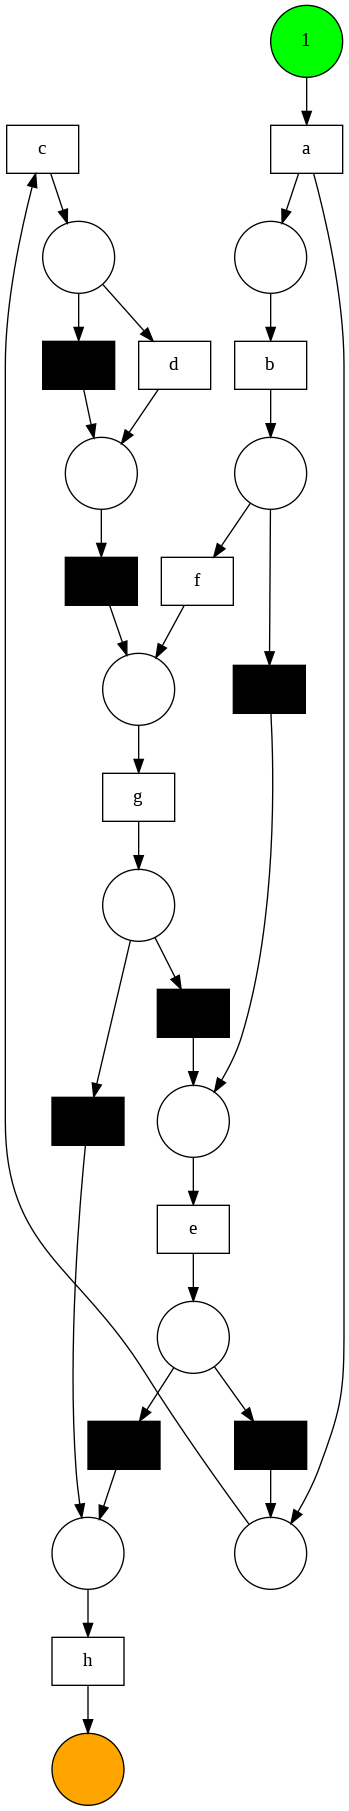

In [0]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

In [0]:
#File path
filename = '/content/drive/My Drive/Excel/Examplebadjulian.xes'
log = xes_import_factory.apply(filename)


In [0]:
from pm4py.algo.conformance.tokenreplay import factory as token_replay

replay_result = token_replay.apply(log, net, initial_marking, final_marking)

In [0]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(replay_result, variant="token_replay")

In [0]:
log_fitness

{'average_trace_fitness': 0.899506079027356,
 'log_fitness': 0.8995060790273557,
 'perc_fit_traces': 71.63120567375887}